# Data preparation

## Load data

***Welches sind die wichtigsten Indikatoren um einen Herzinfarkt vorherzusagen?***

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
import sys
from pathlib import Path

In [7]:
file_name = 'healthcare-dataset-stroke-data.csv'
data_path = Path(sys.path[0]) / 'Data' / file_name

**Get an idea with what we are dealing with**

In [8]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.shape
print('The dataset contains', data.shape[0], 'records and has', data.shape[1], 'features.', sep=' ')

The dataset contains 5110 records and has 12 features.


In [9]:
print('Get an idea what in the dataset.')
data.describe(include="all")

Get an idea what in the dataset.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [10]:
print('Number of unique values in each column')
data.nunique()

Number of unique values in each column


id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [11]:
print('View and count values in columns with string entries')

for col in 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status':
    print(f'{col}: {np.unique(data[col])} -> {np.unique(data[col]).size}')

View and count values in columns with string entries
gender: ['Female' 'Male' 'Other'] -> 3
ever_married: ['No' 'Yes'] -> 2
work_type: ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children'] -> 5
Residence_type: ['Rural' 'Urban'] -> 2
smoking_status: ['Unknown' 'formerly smoked' 'never smoked' 'smokes'] -> 4


### Data split

In [12]:
data['gender'][data['gender'] == 'Other'].count()

1

**Conclusion**:
- row with 'Other' gender is just 1, so we will drop that row later.
- because it is just one this sample will not have a significant impact to our further processing.


In [13]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only bmi has missing values


### Prepare Splitting

In [14]:
# drop a row with value 'Other' in the column 'gender' 
data = data[data['gender'] != 'Other']

# Drop ID column as it does not carry any useful information just noise
data = data.drop('id', axis=1)

In [15]:
print(f'Total number of "Unknown": {data[data["smoking_status"] == "Unknown"].shape[0]}')

print(f"Children with 'Unknown' smoking_status: {data[(data['work_type'] == 'children') &  (data['smoking_status'] == 'Unknown')].shape[0]}")

# in total Unknown = 1544
# children = 687 
# out of 687 children 618 has "Unknown" smoking_status
# out of 687 children 2 with stroke
# for 618 children that has "Unknown" in smoking_status value is replaced with "never smoked"
# Remaining "Unknown" that not children 926, which for the time being we remove! 

Total number of "Unknown": 1544
Children with 'Unknown' smoking_status: 618


In [16]:
# Number of
data[data['smoking_status'] == 'Unknown'].shape #TODO: Rerun code so that the row number is right again

(1544, 11)

In [17]:
# Check how many 'Unknown'
# in total Unknown = 1544

# Workflow
# First change "Unknown" values where "work_type" = "children"
# Then remove rows with "Unknown"

# children = 687 
# out of 687 children 618 has "Unknown" smoking_status
# out of 687 children 2 with stroke
# for 618 children that has "Unknown" in smoking_status value is replaced with "never smoked"
# Remaining "Unknown" that not children 926, which for the time being we remove!

# Remove 926 values with "Unknown" where "work_type" is not "children"
# out of which 45 were with stroke
data = data.drop(data[(data['work_type'] != 'children') &  (data['smoking_status'] == 'Unknown')].index) 


# TODO: replace "Unknown" to "never smoked"
data = data.replace('Unknown', 'never smoked')

In [18]:
data[data['smoking_status'] == 'Unknown']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [19]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Check if there are duplicated rows in the dataset

In [20]:
duplicated = data[data.duplicated()]
duplicated.empty
print('Remove the id, then check for duplicated, just to check if some one messed up the ids. Is duplicates empty:', duplicated.empty)

Remove the id, then check for duplicated, just to check if some one messed up the ids. Is duplicates empty: True


### Splitting Train and Test Data

In [21]:
# Columns of feature and target:
features = data.columns[:-1] 
target = data.columns[-1] # 'stroke'

print(f"Features: {list(features)}")
print(f"Target: {target}")

Features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
Target: stroke


#### Function for playing with data splitting

In [22]:
from sklearn.model_selection import train_test_split

# Split data into train and test data,
# excluding the id column and use the last column 'stroke' as the target
#TODO: Maybe use another test_size e.g. 20%


def split_data(test_size=.1, rand_state = 42):
    """Split with a given `test_size` and `random state`"""
    X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=test_size, random_state=rand_state)
    return X_train, X_test, y_train, y_test

In [23]:
X_train, X_test, y_train, y_test = split_data()

### Values in Columns:

### Working with MISSING values 

1. Find the NaN

2. look in every colums which items in.
    In smoke column, unknown
    In gender column, unknown.

3. in gender only 1 row with Other. so drop it.
4. task 


#### Find the NaN

In [24]:
print('NaN in Xtrain'.center(30, '-'), X_train.isna().sum(), sep='\n')
print("\n")
print("NaN in Xtest".center(30, '-'), X_test.isna().sum(), sep='\n')

--------NaN in Xtrain---------
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  138
smoking_status         0
dtype: int64


---------NaN in Xtest---------
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  17
smoking_status        0
dtype: int64


NaN values are only present in "bmi" column. 
These values are filled by using 3 different strategies:
1. np.nanmean() / np.nanmedian()
2. SimpleImputer
3. IterativeImputer

#### NaN values replacement Strategy 1 - Numpy

In [25]:
X_train_str1 = X_train.fillna(np.nanmean(X_train['bmi']))
X_test_str1 = X_test.fillna(np.nanmean(X_test['bmi']))
print('NaN values in X_train:', X_train_str1.bmi.isna().sum())
print('NaN values in X_test:', X_test_str1.bmi.isna().sum())

NaN values in X_train: 0
NaN values in X_test: 0


#### NaN values replacement Strategy 2 & 3 - SimpleImputer & IterativeImputer
As the dataset includes columns of different data type, one has to separate columns with numeric values, so that an imputer could be used

Also to have the data in the same order one has to manipulate pandas DataFrame

In [26]:
# Filtering columns with numerical values
numeric_columns = [col for col in X_train.columns if X_train[col].dtype != object]
object_columns = [col for col in X_train.columns if X_train[col].dtype == object]
numeric_columns

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [27]:
# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# Simple imputer
imputer_simple = SimpleImputer(missing_values=np.nan, strategy='mean')
# ------------
# Train data
# ------------
str2_train_imputed = imputer_simple.fit_transform(X_train[numeric_columns])
df_str2_train_imputed = pd.DataFrame(str2_train_imputed, columns=numeric_columns, index=X_train.index).bmi
X_train_str2 = X_train.copy()
X_train_str2.bmi = df_str2_train_imputed
#X_train_str2
print('NaN values in X_train:', X_train_str2.isna().sum(), sep='\n')
# ------------
# Test data
# ------------
str2_test_imputed = imputer_simple.fit_transform(X_test[numeric_columns])
df_str2_test_imputed = pd.DataFrame(str2_test_imputed, columns=numeric_columns, index=X_test.index).bmi
X_test_str2 = X_test.copy()
X_test_str2.bmi = df_str2_test_imputed
#X_train_str2
print('\n')
print('NaN values in X_test:', X_test_str2.isna().sum(), sep='\n')

NaN values in X_train:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


NaN values in X_test:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [28]:
# Iterative Imputer
imputer_iter = IterativeImputer(missing_values=np.nan, random_state=42)
# ------------
# Train data
# ------------
str3_train_imputed = imputer_iter.fit_transform(X_train[numeric_columns])
df_str3_train_imputed = pd.DataFrame(str3_train_imputed, columns=numeric_columns, index=X_train.index).bmi
X_train_str3 = X_train.copy()
X_train_str3.bmi = df_str3_train_imputed
print('NaN values in X_train:', X_train_str3.isna().sum(), sep='\n')
# ------------
# Test data
# ------------
str3_test_imputed = imputer_iter.fit_transform(X_test[numeric_columns])
df_str3_test_imputed = pd.DataFrame(str3_test_imputed, columns=numeric_columns, index=X_test.index).bmi
X_test_str3 = X_test.copy()
X_test_str3.bmi = df_str3_test_imputed
print('\n')
print('NaN values in X_test:', X_test_str3.isna().sum(), sep='\n')

NaN values in X_train:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64




NaN values in X_test:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [29]:
object_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [30]:
for i in object_columns:
    print(f'{i}: {data[i].unique()}')

gender: ['Male' 'Female']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes']


### Object encoding

We have 5 columns with "object" data type. In the following step, these objects a.k.a strings are converted to the following numerical values.

    - gender: Male = 0, Female = 1
    - ever_married: No = 0, Yes = 1 
    - work_type: 
    - Redidence_type: Urban = 1, Rural = 0
    - smoking_status: 'formerly smoked' = 10, 'never smoked' = 0, 'smokes' = 25

For replacing objects with the above numerical values one can follow different strategies such as employing pandas build in `replace` function or using encoders from `sklearn.preprocessing`

Short summary of the values: 
 - NaN values were replaced by using `Numpy.mean()` and `pandas.DataFrame.replace()`

        `X_train_str1
         X_test_str1`
 - NaN values were replaced by using `SimpleImputer`

       `X_train_str2
        X_test_str2`
 - NaN values were replaced by using `IterativeImputer`

       `X_train_str3
        X_test_str3`

#### Option 1 - Using `pandas.DataFrame.replace()`

In [31]:
'''
# NaN values were replaced by using Numpy.mean() and pandas.DataFrame.replace()
    X_train_str1
    X_test_str1
# NaN values were replaced by using SimpleImputer
    X_train_str3
    X_test_str3
# NaN values were replaced by using IterativeImputer
    X_train_str3
    X_test_str3
'''
# gender column: Male & Female to 0 & 1
X_train_str1.gender.replace(to_replace=dict(Male=0, Female=1), inplace=True)
X_test_str1.gender.replace(to_replace=dict(Male=0, Female=1), inplace=True)
# TODO: replace values in the other columns


#### Option 2 - Using `sklearn.preprocessing`

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
# TODO: Missing 'work_type' encoding - there are 5 categories 
# The order in the list affects the values given to the object
encoding_dict = {
    'gender': ['Male', 'Female'],
    'ever_married': ['No', 'Yes'],
    'Residence_type': ['Urban', 'Rural'] ,
    'smoking_status': ['never smoked', 'formerly smoked', 'smokes'],
    'work_type': ['children', 'Never_worked', 'Govt_job',  'Private', 'Self-employed']
}

# Dictionary keys
key = list(encoding_dict.keys())
categories = [encoding_dict[key] for key in list(encoding_dict.keys())]

ord_encoder = OrdinalEncoder(categories=categories)
X_train_str2_encoded = ord_encoder.fit_transform(X_train_str2[key])
X_train_str2[key] = X_train_str2_encoded
X_train_str2

# ------------
# Test data
# ------------
X_train_str2_encoded = ord_encoder.fit_transform(X_train_str2[key])
X_train_str2[key] = X_train_str2_encoded
X_train_str2
# ------------
# Test data
# ------------
X_test_str2_encoded = ord_encoder.fit_transform(X_test_str2[key])
X_test_str2[key] = X_test_str2_encoded
X_test_str2
#for key in encoding_dict.keys():
#    ord_encoder = OrdinalEncoder(categories=encoding_dict[key])
#    X_train_str2_encoded = ord_encoder.fit_transform([X_train_str2[key]])
#    #X_train_str2[key] = X_train_str2_encoded
#    print(key, X_train_str2_encoded)
#X_train_str2_encoded
#X_train_str2[list(encoding_dict.keys())]



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2816,0.0,50.0,0,0,1.0,3.0,0.0,67.02,28.727275,1.0
190,1.0,65.0,0,0,1.0,3.0,0.0,205.77,46.000000,1.0
1153,0.0,45.0,0,0,1.0,2.0,1.0,86.99,37.900000,0.0
4789,1.0,39.0,0,0,1.0,3.0,1.0,89.32,31.000000,1.0
842,1.0,23.0,0,0,0.0,3.0,1.0,79.13,32.900000,1.0
...,...,...,...,...,...,...,...,...,...,...
4219,1.0,55.0,0,0,1.0,2.0,0.0,71.79,43.000000,1.0
576,0.0,29.0,0,0,0.0,3.0,0.0,207.58,22.800000,2.0
3786,1.0,1.8,0,0,0.0,0.0,1.0,95.28,16.500000,0.0
4617,0.0,57.0,0,0,1.0,2.0,0.0,75.53,33.100000,1.0


#### Option 3 - Using `pandas.DataFrame.map` function

The easiest to use

In [34]:
encoding_dict1 = {
    'gender': {'Male': 0, 'Female': 1},
    'ever_married': {'No': 0, 'Yes': 1},
    'Residence_type': {'Urban': 1, 'Rural': 0},
    'smoking_status': {'never smoked': 0, 'formerly smoked': 10, 'smokes': 25}
}

for col, mapping in encoding_dict1.items():
    X_train_str3[col] = X_train_str3[col].map(mapping)

In [35]:
X_train_str3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2816,0,50.0,0,0,1,Private,1,67.02,28.787154,10
190,1,65.0,0,0,1,Private,1,205.77,46.000000,10
1153,0,45.0,0,0,1,Govt_job,0,86.99,37.900000,0
4789,1,39.0,0,0,1,Private,0,89.32,31.000000,10
842,1,23.0,0,0,0,Private,0,79.13,32.900000,10
...,...,...,...,...,...,...,...,...,...,...
4219,1,55.0,0,0,1,Govt_job,1,71.79,43.000000,10
576,0,29.0,0,0,0,Private,1,207.58,22.800000,25
3786,1,1.8,0,0,0,children,0,95.28,16.500000,0
4617,0,57.0,0,0,1,Govt_job,1,75.53,33.100000,10


In [36]:
for key in encoding_dict.keys():
    print(encoding_dict[key])

['Male', 'Female']
['No', 'Yes']
['Urban', 'Rural']
['never smoked', 'formerly smoked', 'smokes']
['children', 'Never_worked', 'Govt_job', 'Private', 'Self-employed']


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4183 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4183 non-null   object 
 1   age                4183 non-null   float64
 2   hypertension       4183 non-null   int64  
 3   heart_disease      4183 non-null   int64  
 4   ever_married       4183 non-null   object 
 5   work_type          4183 non-null   object 
 6   Residence_type     4183 non-null   object 
 7   avg_glucose_level  4183 non-null   float64
 8   bmi                4028 non-null   float64
 9   smoking_status     4183 non-null   object 
 10  stroke             4183 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 392.2+ KB


In [38]:
# Gedanken zum ecoding

"""
gender
Female = 1
Male = 0

ever married 
No = 0
Yes = 1

Residence_type
Rural = 0
Urban = 1

bmi mean # das gewicht sollte normalverteilt sein und da das bmi = gewicht/größe² ist,
        # denke ich wir können es einfach als indikator verwenden
        # unser datensatz behalndelt bmi ähnlich wie gewicht

smoking_status # educated guess with data from a website (https://www.health.govt.nz/our-work/preventative-health-wellness/tobacco-control/tobacco-control-information-practitioners/definitions-smoking-status)
# unknown = 2.5
never smoked = 0
formerly smoked = 10
smokes = 25

# -0.5   0   0.5

work_type
simple SimpleImputer
"""

# id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke

# id = id, we guess that these ids have no special purpose other than indexing, so we remove them
# gender = mai (marked as important)
# age = mai
# hypertension = mai
# hypertension (Bluthochdruck) = https://de.wikipedia.org/wiki/Hypertonie , https://www.stiftung-gesundheitswissen.de/wissen/hypertonie/hintergrund
# keep in mind, hypertension is only 0 or 1, so no indicator how bad the condition ist
# heart_disease = mai
# heart_disease (Herzkrankheit) =
# again heart_disease is represented only in 0 or 1, we don't know what kind of heart disease it is
# avg_glucose_level = mai
# avg_glucose_level = avg, indicates it is an average over an unknown timespan max(271,74) with min (55.11) mg/dl
# unterzuckert < 70 mg/dl oversuggerd > 16 mg/dl, also the glucose level also depends on what the person eats but I assume therefor we have an avg
# do you want to know more: https://www.helios-gesundheit.de/magazin/news/news/blutzuckerwerte-und-ihre-bedeutung/
# ever_married = well, well, well, funny but useless imoo, why, because we don't know anything about the number of marrages, if they is still merrid or the overall quality
# however I will run several runs with and without this column
# work_type = of course it strongly depends but maybe we get an interesting insight
# bmi =


'\ngender\nFemale = 1\nMale = 0\n\never married \nNo = 0\nYes = 1\n\nResidence_type\nRural = 0\nUrban = 1\n\nbmi mean # das gewicht sollte normalverteilt sein und da das bmi = gewicht/größe² ist,\n        # denke ich wir können es einfach als indikator verwenden\n        # unser datensatz behalndelt bmi ähnlich wie gewicht\n\nsmoking_status # educated guess with data from a website (https://www.health.govt.nz/our-work/preventative-health-wellness/tobacco-control/tobacco-control-information-practitioners/definitions-smoking-status)\n# unknown = 2.5\nnever smoked = 0\nformerly smoked = 10\nsmokes = 25\n\n# -0.5   0   0.5\n\nwork_type\nsimple SimpleImputer\n'

<Axes: ylabel='Frequency'>

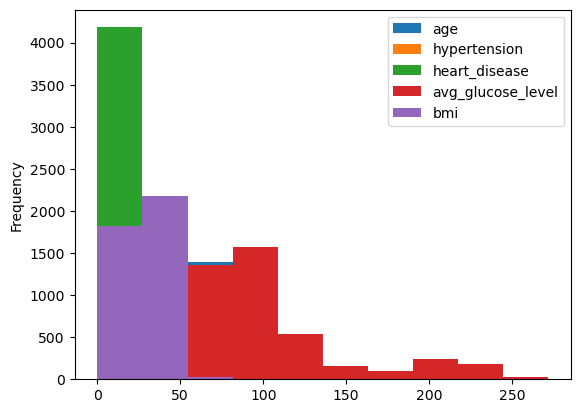

In [39]:
#data[][1::].plot.hist()
data[data.columns[1:-1]].plot.hist()


In [40]:
1544/5110

0.3021526418786693